In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [72]:
column_names = ["Time (s)", "X (m/s2)", "Y (m/s2)", "Z (m/s2)", "R (m/s2)", "Theta (deg)", "Phi (deg)"]


In [73]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        # Read all lines from the file, skipping the first four metadata lines
        lines = file.readlines()[4:]
        print(file)
        # Initialize an empty list to hold parsed data
        data = []
        # count=0
        # Process each line, split by comma, and strip any leading/trailing whitespace
        for line in lines:
            values = line.strip().split(',')
            # print(values)
            if len(values) == len(column_names):  # Ensure correct number of columns
                data.append(values)
            # if count<=5:
            #     print(column_names)
            #     print(data)
            #     count+=1
            
        
        # Create DataFrame with specified column names
        df = pd.DataFrame(data, columns=column_names)
        # print(df)
        # Convert numeric columns to float where applicable
        numeric_columns = column_names[1:]  # Exclude 'Time (s)'
        print(numeric_columns)
        df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
        
    return df

In [74]:
files = {
    'LA': 'Final_Dataset/Abhay/LA.csv',
    'RA': 'Final_Dataset/Abhay/RA.csv',
    'LK': 'Final_Dataset/Abhay/LK.csv',
    'RK': 'Final_Dataset/Abhay/RK.csv',
    'LH': 'Final_Dataset/Abhay/LH.csv',
    'RH': 'Final_Dataset/Abhay/RH.csv'
}

In [75]:
# Load data for each body part
data = {key: load_data(file) for key, file in files.items()}
# print(data['LH'])

<_io.TextIOWrapper name='Final_Dataset/Abhay/LA.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']
<_io.TextIOWrapper name='Final_Dataset/Abhay/RA.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']
<_io.TextIOWrapper name='Final_Dataset/Abhay/LK.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']
<_io.TextIOWrapper name='Final_Dataset/Abhay/RK.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']
<_io.TextIOWrapper name='Final_Dataset/Abhay/LH.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']
<_io.TextIOWrapper name='Final_Dataset/Abhay/RH.csv' mode='r' encoding='UTF-8'>
['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']


In [50]:
print(data['LA'].head())
print(data['RA'].head())
print(data['LH'].head())
print(data['RH'].head())
print(data['LK'].head())
print(data['RK'].head())

     Time (s)  X (m/s2)  Y (m/s2)  Z (m/s2)  R (m/s2)  Theta (deg)  Phi (deg)
0  "0.0070470 -1.389632  9.425926 -0.578465  9.545354    93.474350        NaN
1  "0.0093959 -1.423131  9.325428 -0.559322  9.449961    93.393196        NaN
2  "0.0117446 -1.461416  9.344570 -0.573679  9.475539    93.470993        NaN
3  "0.0140936 -1.466202  9.492926 -0.588036  9.623470    93.503204        NaN
4  "0.0164428 -1.432703  9.622138 -0.540180  9.743201    93.178207        NaN
     Time (s)  X (m/s2)  Y (m/s2)  Z (m/s2)  R (m/s2)  Theta (deg)  Phi (deg)
0  "0.0148891  1.348845  9.298887  0.107260  9.396818    89.345978        NaN
1  "0.0198531  1.324329  9.529776  0.279978  9.625427    88.333183        NaN
2  "0.0248156  1.481436  9.652358  0.343568  9.771423    87.985039        NaN
3  "0.0297781  1.393569  9.659245  0.353729  9.765662    87.924194        NaN
4  "0.0347422  1.291777  9.645405  0.226884  9.734166    88.664429        NaN
     Time (s)  X (m/s2)  Y (m/s2)  Z (m/s2)   R (m/s2)  Theta (d

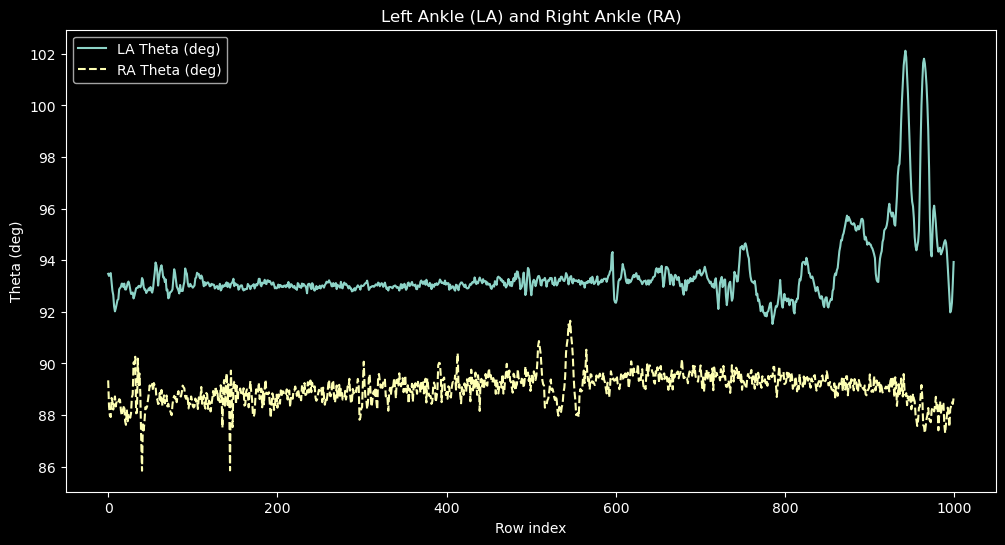

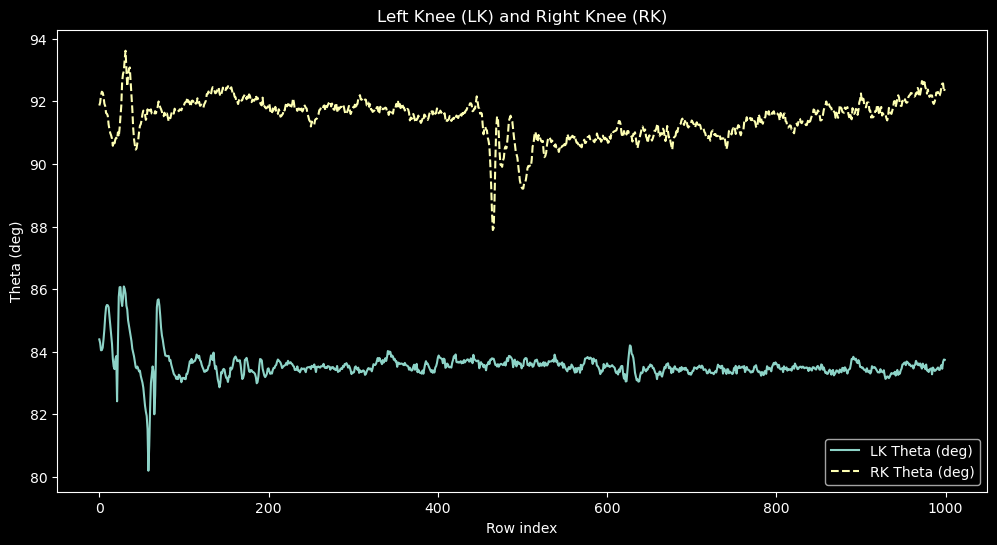

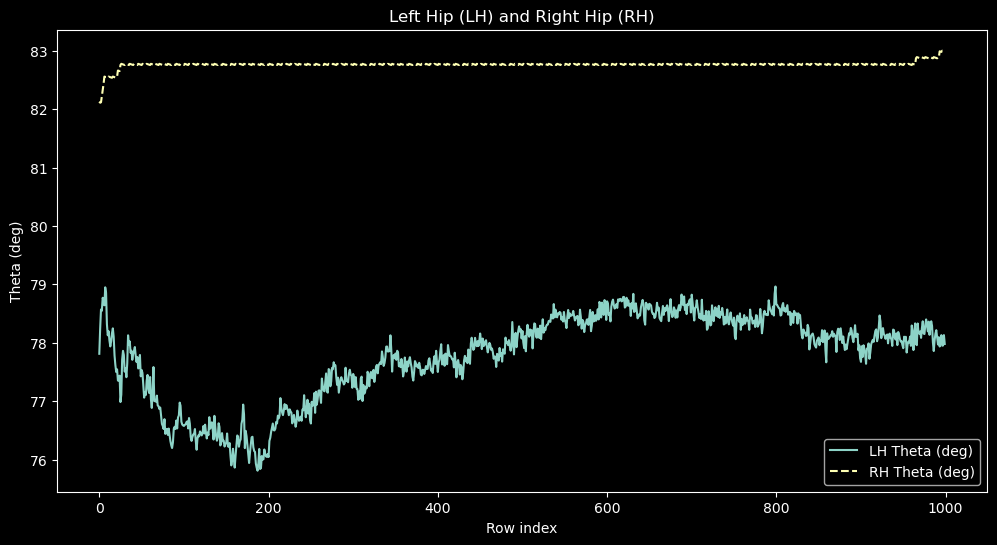

In [51]:
def plot_theta(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['Theta (deg)'].iloc[:1000], label=f'{label1} Theta (deg)')
    plt.plot(data2.index[:1000], data2['Theta (deg)'].iloc[:1000], label=f'{label2} Theta (deg)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('Theta (deg)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_theta(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_theta(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_theta(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

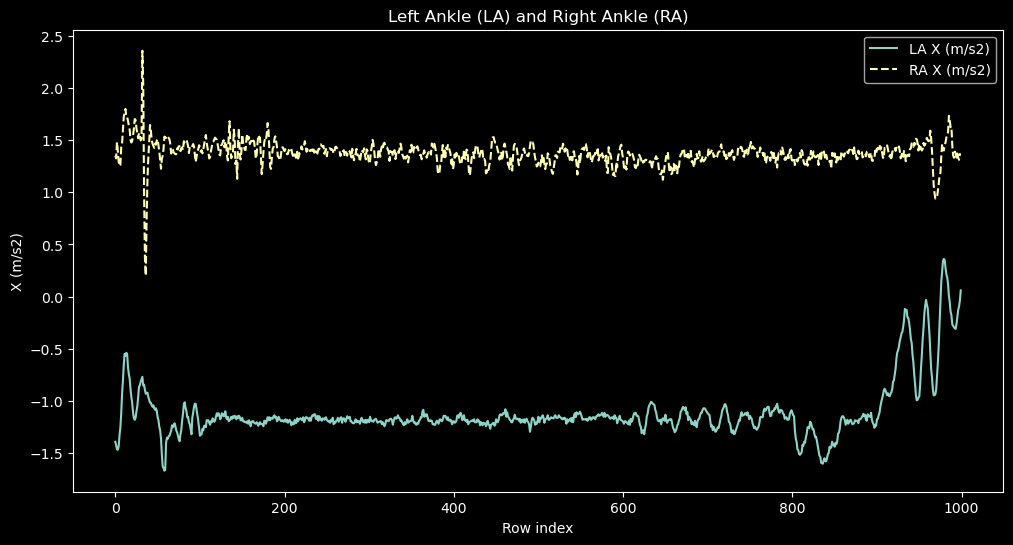

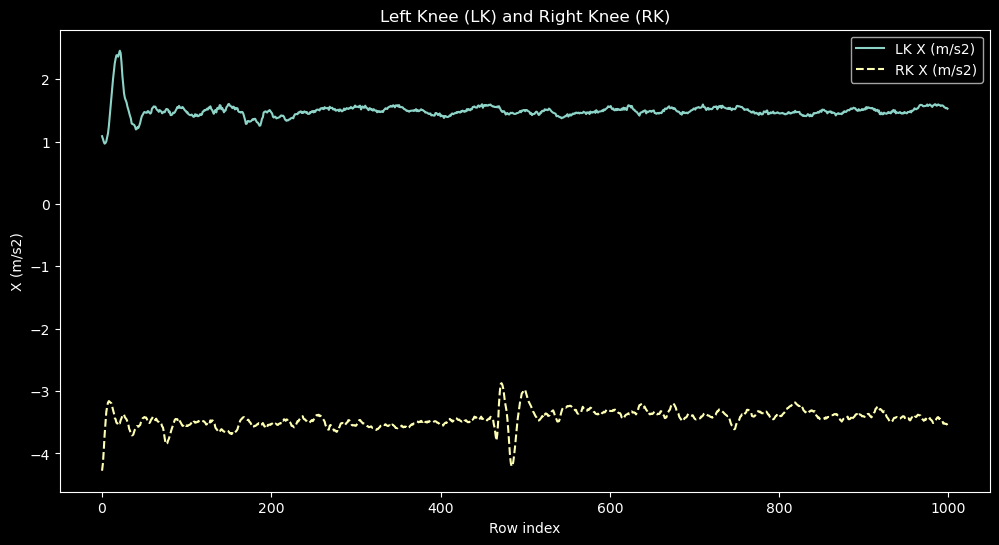

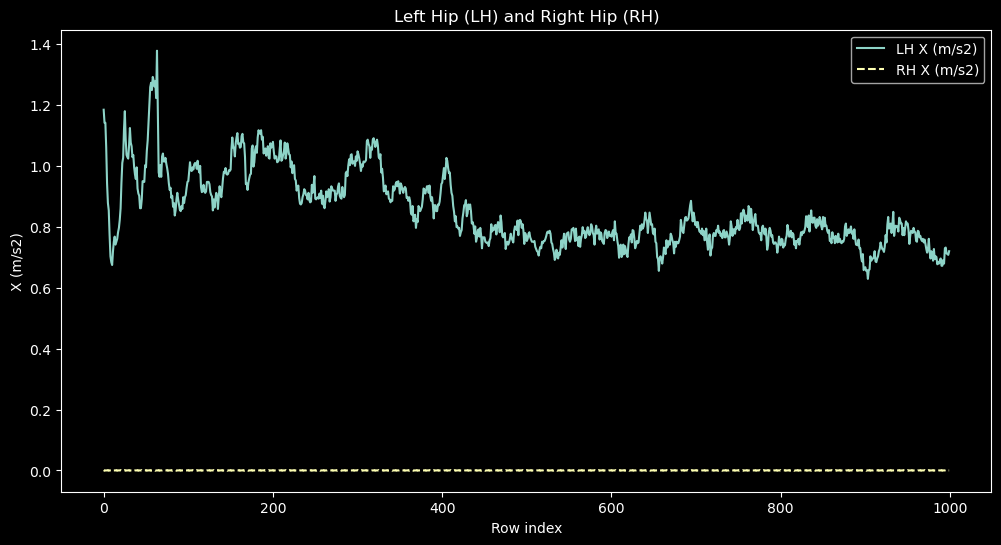

In [52]:
def plot_X(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['X (m/s2)'].iloc[:1000], label=f'{label1} X (m/s2)')
    plt.plot(data2.index[:1000], data2['X (m/s2)'].iloc[:1000], label=f'{label2} X (m/s2)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('X (m/s2)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_X(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_X(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_X(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

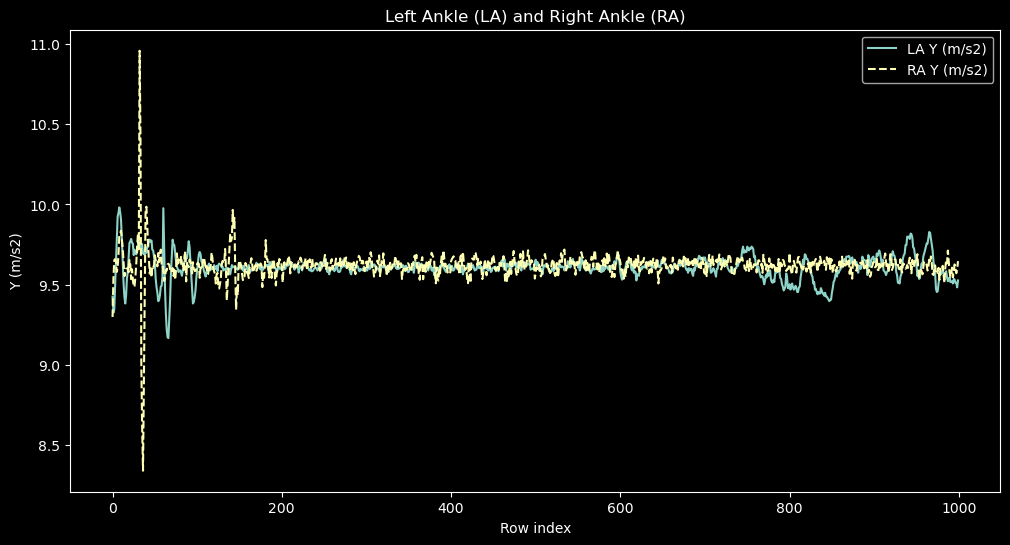

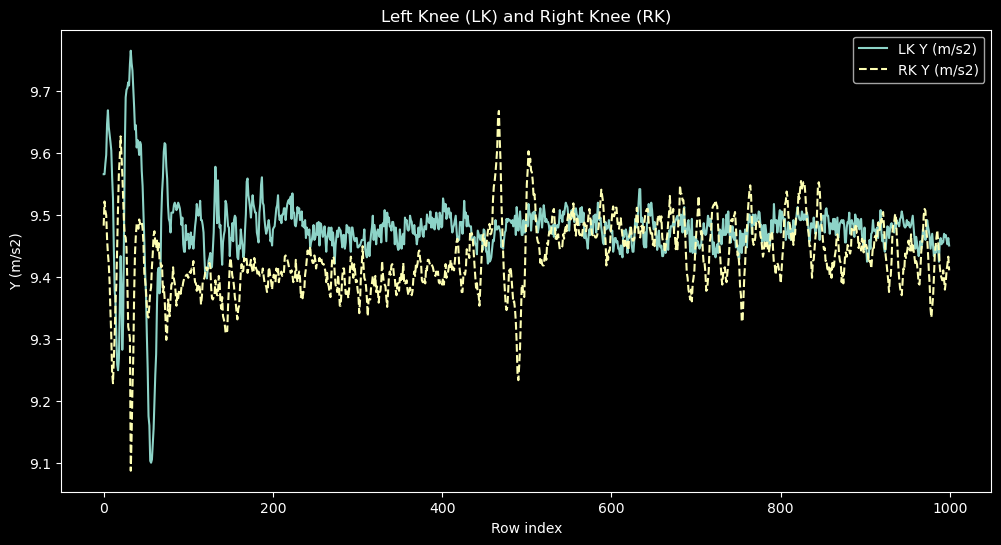

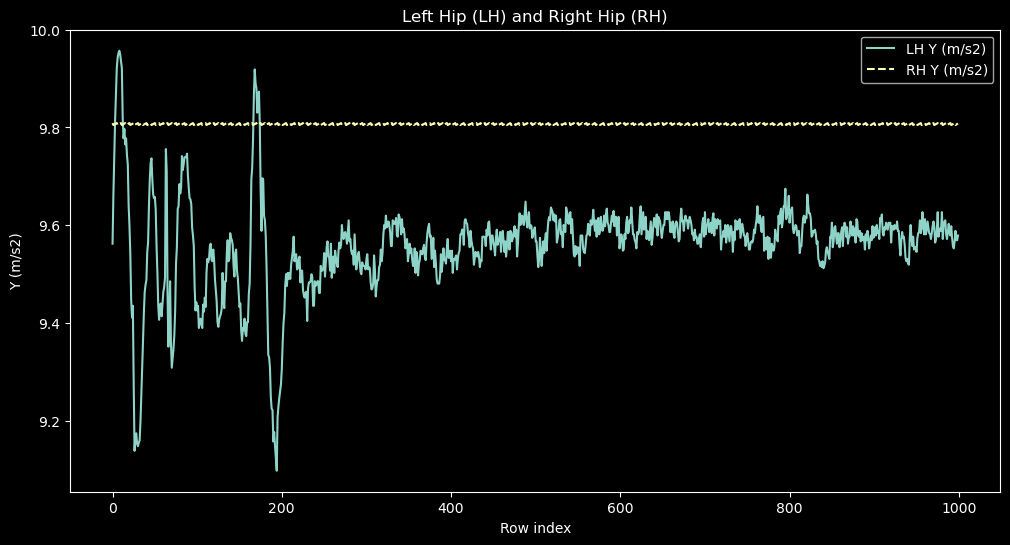

In [53]:
def plot_Y(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['Y (m/s2)'].iloc[:1000], label=f'{label1} Y (m/s2)')
    plt.plot(data2.index[:1000], data2['Y (m/s2)'].iloc[:1000], label=f'{label2} Y (m/s2)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('Y (m/s2)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_Y(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_Y(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_Y(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

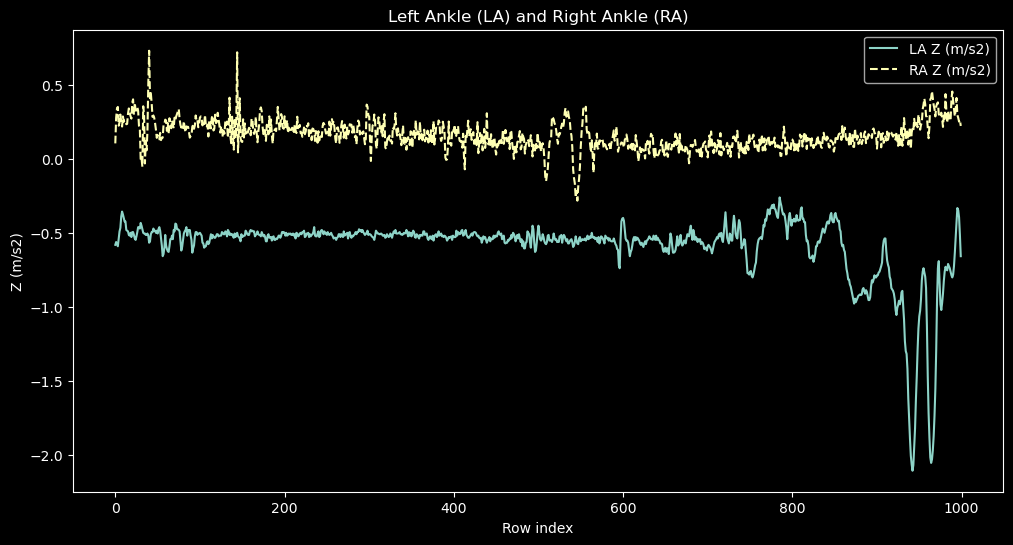

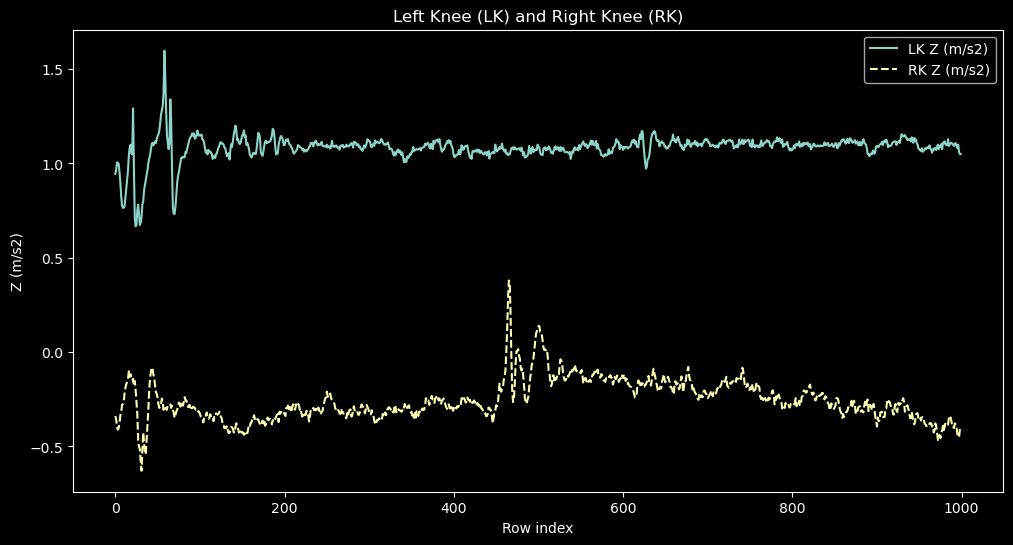

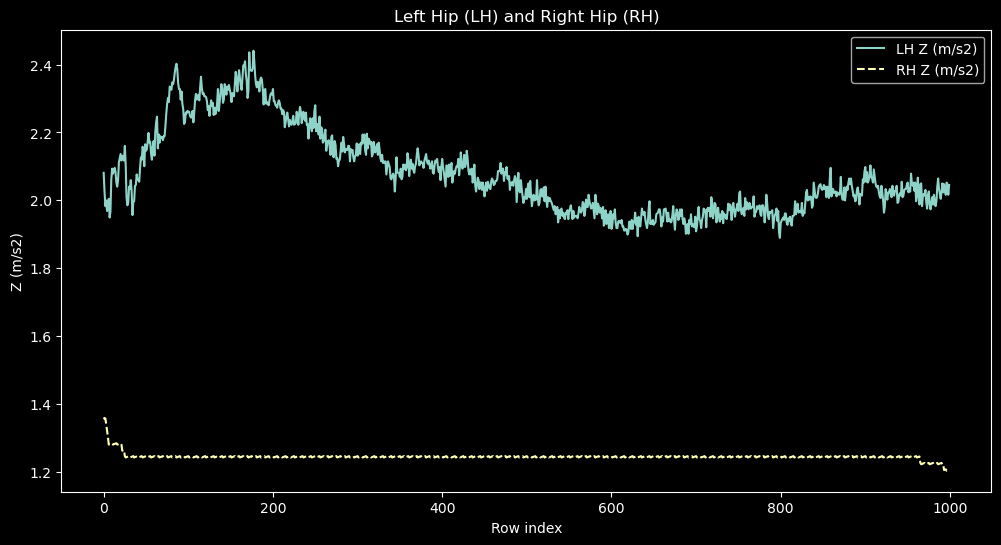

In [54]:
def plot_Z(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['Z (m/s2)'].iloc[:1000], label=f'{label1} Z (m/s2)')
    plt.plot(data2.index[:1000], data2['Z (m/s2)'].iloc[:1000], label=f'{label2} Z (m/s2)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('Z (m/s2)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_Z(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_Z(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_Z(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

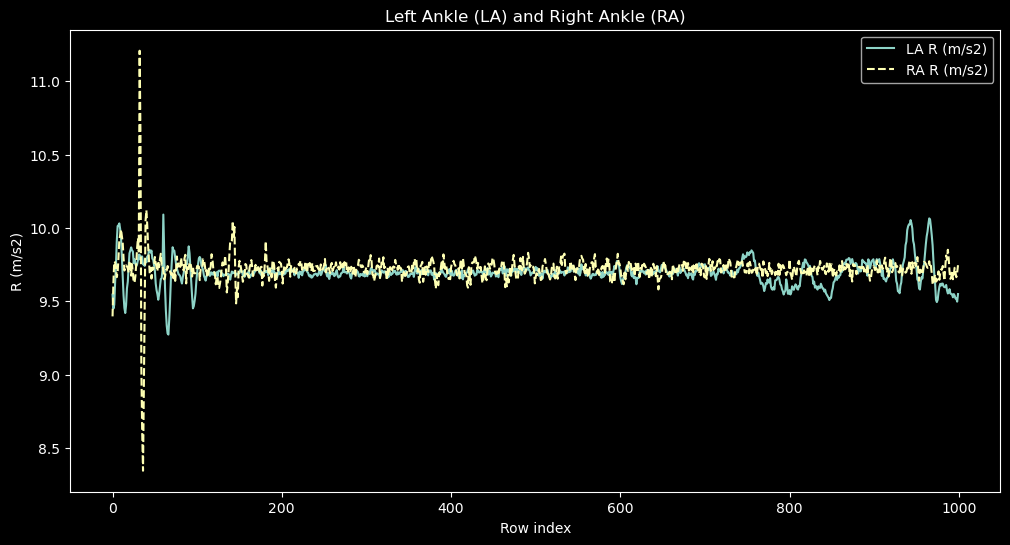

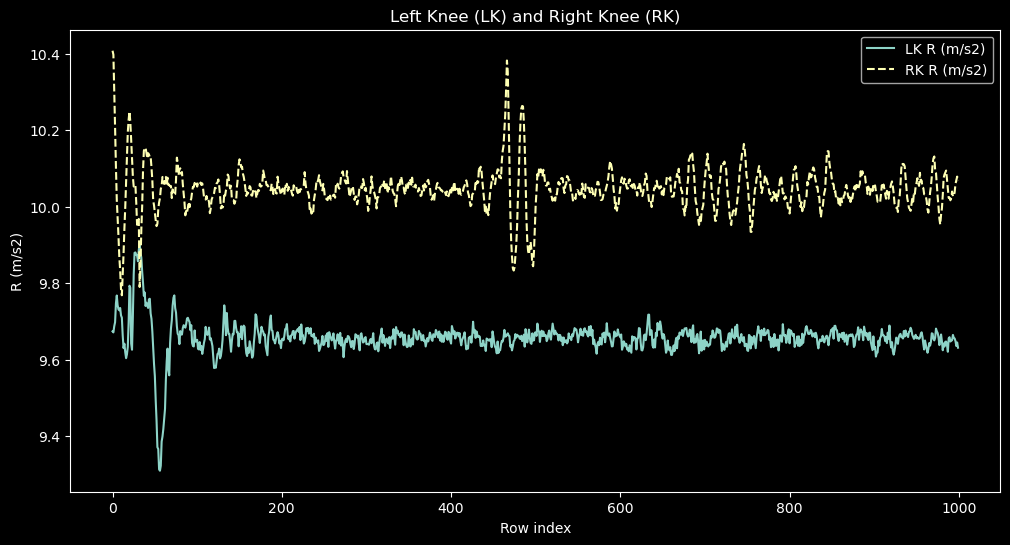

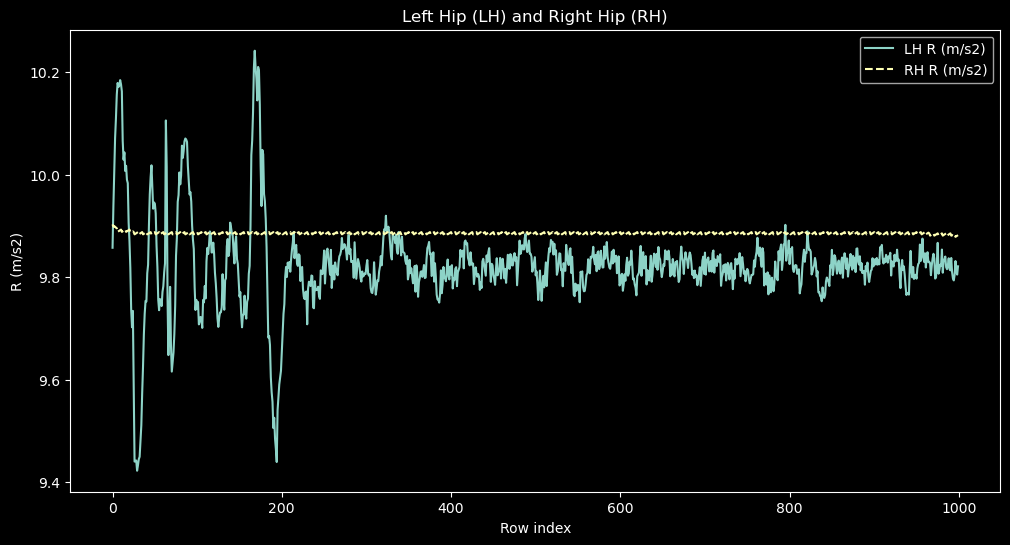

In [55]:
def plot_R(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['R (m/s2)'].iloc[:1000], label=f'{label1} R (m/s2)')
    plt.plot(data2.index[:1000], data2['R (m/s2)'].iloc[:1000], label=f'{label2} R (m/s2)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('R (m/s2)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_R(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_R(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_R(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

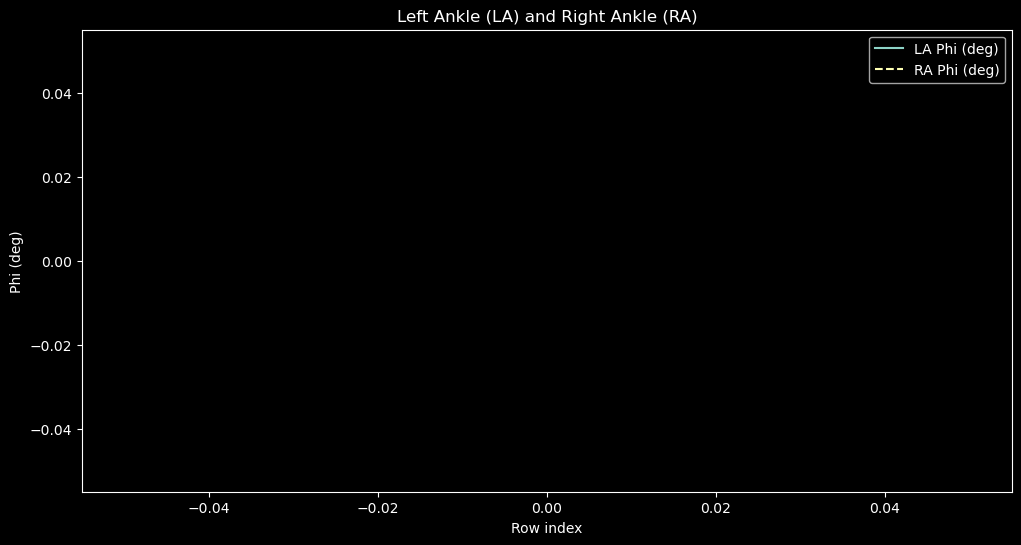

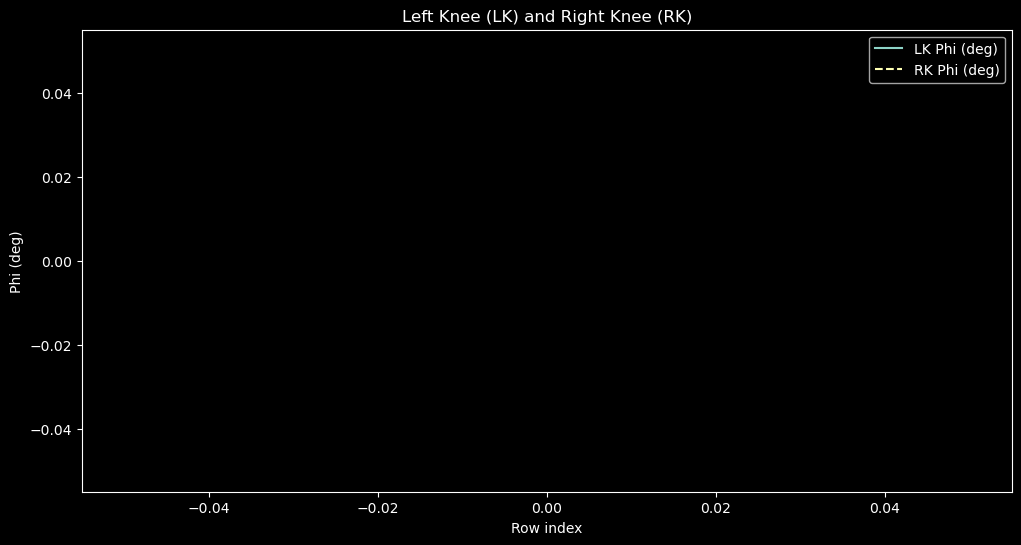

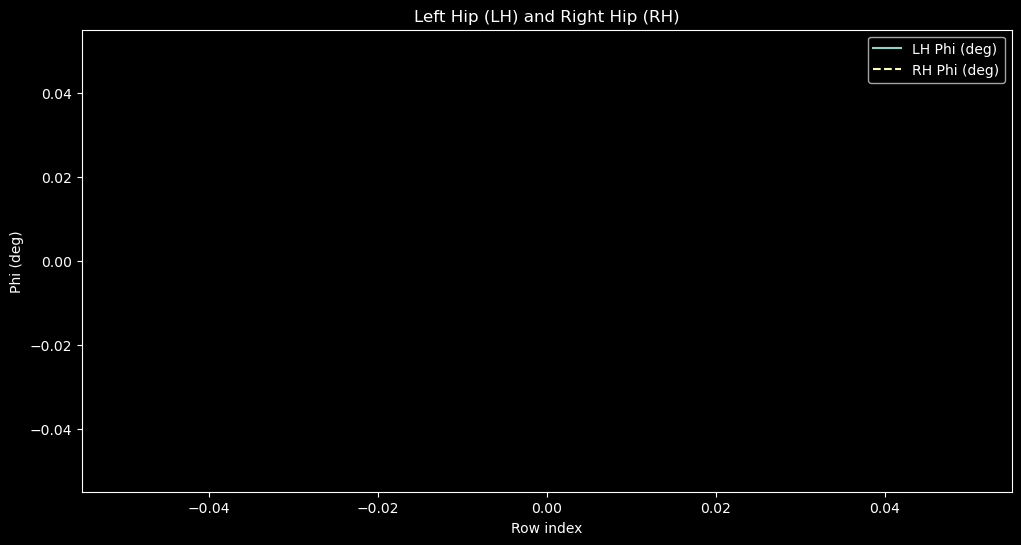

In [56]:
def plot_phi(data1, data2, label1, label2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Theta (deg) for data1 and data2 (first 500 rows)
    plt.plot(data1.index[:1000], data1['Phi (deg)'].iloc[:1000], label=f'{label1} Phi (deg)')
    plt.plot(data2.index[:1000], data2['Phi (deg)'].iloc[:1000], label=f'{label2} Phi (deg)', linestyle='dashed')
    
    plt.title(title)
    plt.xlabel('Row index')
    plt.ylabel('Phi (deg)')
    plt.legend()
    plt.show()

# Plotting LA and RA together
plot_phi(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# Plotting LK and RK together
plot_phi(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# Plotting LH and RH together
plot_phi(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

In [57]:
# def plot_theta_side(data1, data2, label1, label2, title):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
#     # Plot for data1
#     ax1.plot(data1.index[:1000], data1['Theta (deg)'].iloc[:1000], label=f'{label1} Theta (deg)')
#     ax1.set_title(f'{label1} - {title}')
#     ax1.set_xlabel('Row index')
#     ax1.set_ylabel('X (m/s2)')
#     ax1.legend()
    
#     # Plot for data2
#     ax2.plot(data2.index[:1000], data2['Theta (deg)'].iloc[:1000], label=f'{label2} Theta (deg)', linestyle='dashed')
#     ax2.set_title(f'{label2} - {title}')
#     ax2.set_xlabel('Row index')
#     ax2.legend()
    
#     plt.suptitle(title)
#     plt.show()
    
# # Plotting LA and RA together
# plot_theta_side(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# # Plotting LK and RK together
# plot_theta_side(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# # Plotting LH and RH together
# plot_theta_side(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

In [58]:
# def plot_X_side(data1, data2, label1, label2, title):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
#     # Plot for data1
#     ax1.plot(data1.index[:1000], data1['X (m/s2)'].iloc[:1000], label=f'{label1} X (m/s2)')
#     ax1.set_title(f'{label1} - {title}')
#     ax1.set_xlabel('Row index')
#     ax1.set_ylabel('X (m/s2)')
#     ax1.legend()
    
#     # Plot for data2
#     ax2.plot(data2.index[:1000], data2['X (m/s2)'].iloc[:1000], label=f'{label2} X (m/s2)', linestyle='dashed')
#     ax2.set_title(f'{label2} - {title}')
#     ax2.set_xlabel('Row index')
#     ax2.legend()
    
#     plt.suptitle(title)
#     plt.show()
    
# # Plotting LA and RA together
# plot_X_side(data['LA'], data['RA'], 'LA', 'RA', 'Left Ankle (LA) and Right Ankle (RA)')

# # Plotting LK and RK together
# plot_X_side(data['LK'], data['RK'], 'LK', 'RK', 'Left Knee (LK) and Right Knee (RK)')

# # Plotting LH and RH together
# plot_X_side(data['LH'], data['RH'], 'LH', 'RH', 'Left Hip (LH) and Right Hip (RH)')

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt, savgol_filter
from scipy.ndimage import gaussian_filter as scipy_gaussian_filter
import pywt

In [60]:
# Function Definitions

# def moving_average(data, window_size):
#     return data.rolling(window=window_size).mean()

# def low_pass_filter(data, cutoff_frequency, sample_rate):
#     nyquist = 0.5 * sample_rate
#     normal_cutoff = cutoff_frequency / nyquist
#     b, a = butter(1, normal_cutoff, btype='low', analog=False)
#     return filtfilt(b, a, data)

def median_filter(data, kernel_size):
    return medfilt(data, kernel_size)

def gaussian_filter_custom(data, sigma):
    return scipy_gaussian_filter(data, sigma=sigma)

# def savitzky_golay_filter(data, window_size, poly_order):
#     return savgol_filter(data, window_length=window_size, polyorder=poly_order)

# def wavelet_denoising(data, wavelet, level):
#     coeffs = pywt.wavedec(data, wavelet, level=level)
#     threshold = np.sqrt(2 * np.log(len(data)))
#     coeffs[1:] = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:]]
#     return pywt.waverec(coeffs, wavelet)
# def wavelet_denoising(data, wavelet='db1', level=1):
#     coeffs = pywt.wavedec(data, wavelet, level=level)
#     threshold = np.sqrt(2 * np.log(len(data))) * np.median(np.abs(coeffs[-level])) / 0.6745
#     new_coeffs = [pywt.threshold(i, value=threshold, mode='soft') for i in coeffs]
#     return pywt.waverec(new_coeffs, wavelet)

from scipy.signal import butter, filtfilt

def butterworth_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


In [61]:
# Parameters
cutoff_frequency = 0.1  # Cutoff frequency in Hz
sample_rate = 100       # Sample rate in Hz
order = 4              # Order of the Butterworth filter

In [62]:
# Ensure the columns are numeric
new_data = data['RK'].copy()
columns_to_process = ['X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)']


In [63]:
# Function to calculate Mean Absolute Error (MAE)
def mean_absolute_error(original, filtered):
    return np.mean(np.abs(original - filtered))

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(original, filtered):
    return np.mean((original - filtered) ** 2)
data_loss = {}


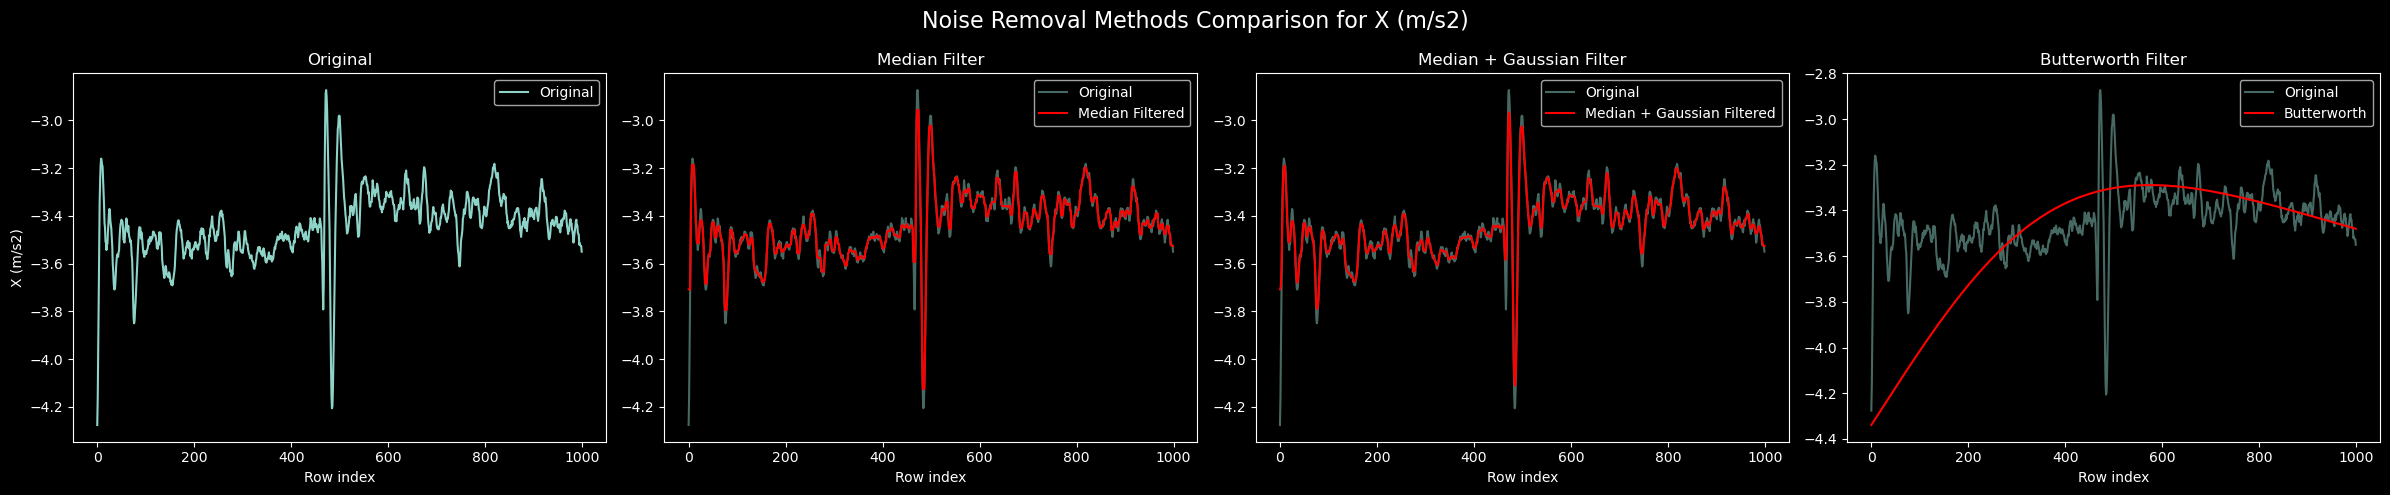

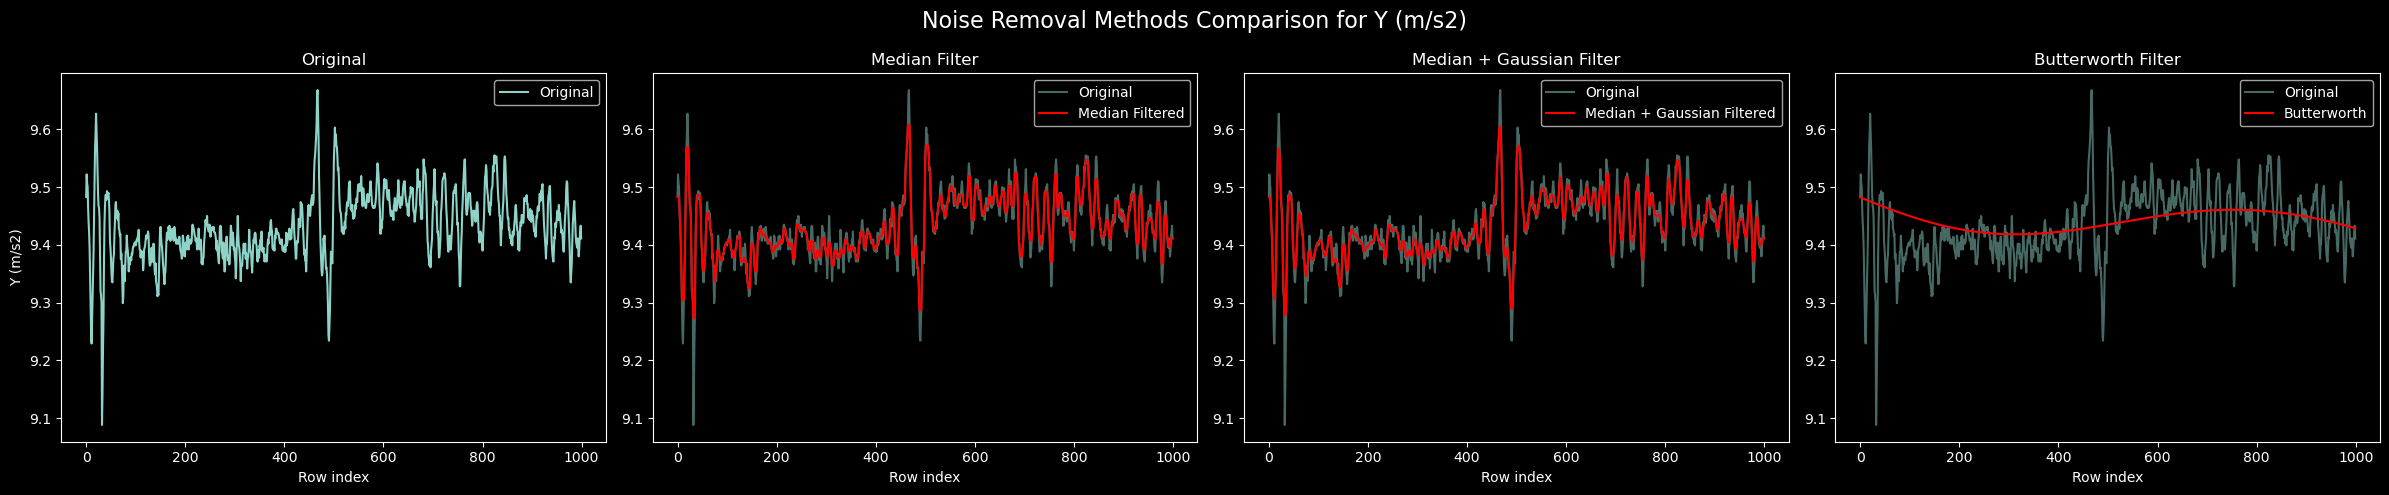

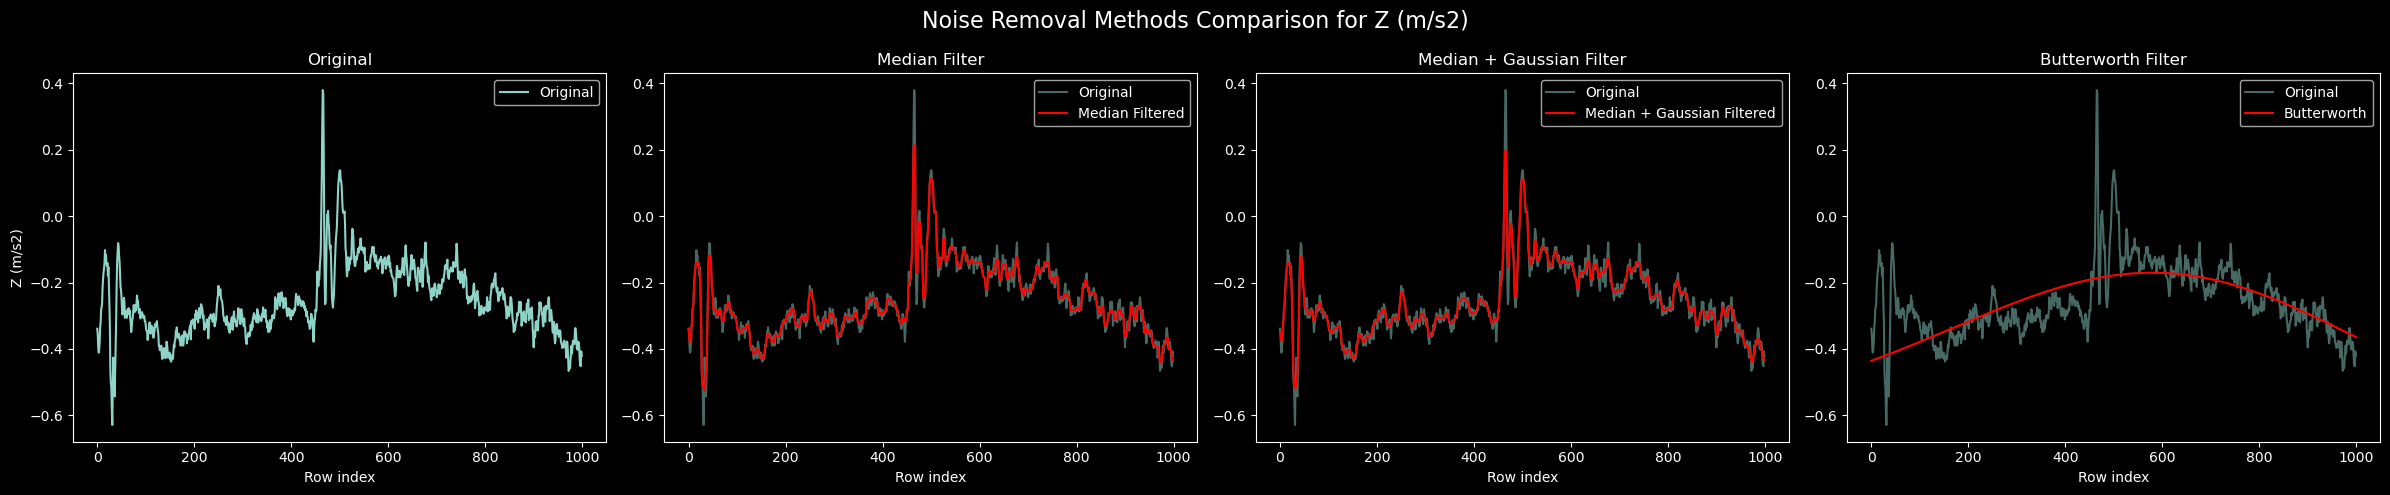

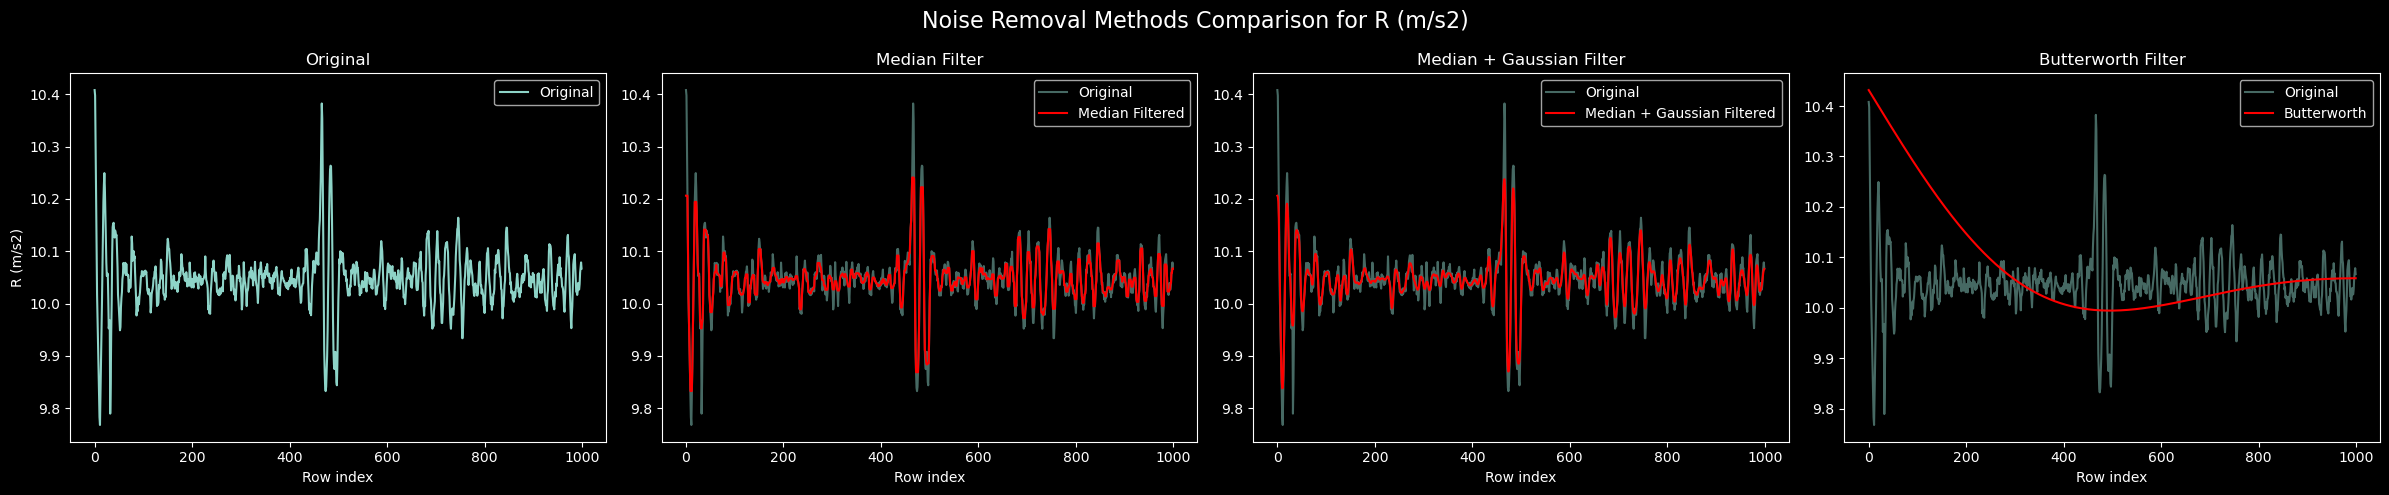

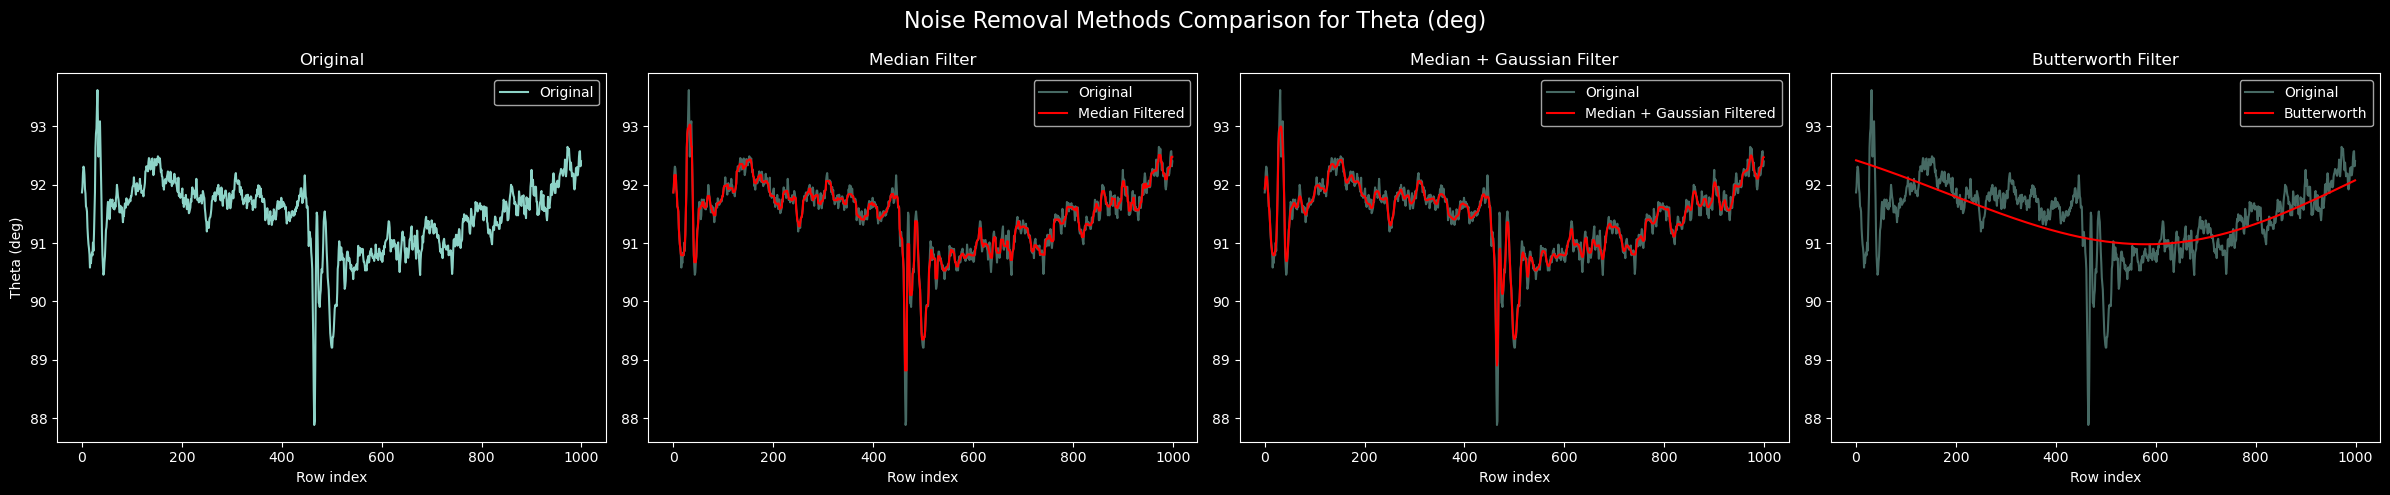

In [65]:
for column in columns_to_process:
    new_data[column] = pd.to_numeric(new_data[column], errors='coerce')
    new_data[column].fillna(method='ffill', inplace=True)  # Forward fill for simplicity

    # Apply noise removal methods
    # new_data[f'{column}_moving_avg'] = moving_average(new_data[column], window_size=5)
    # new_data[f'{column}_low_pass'] = low_pass_filter(new_data[column], cutoff_frequency=0.1, sample_rate=100)
    # new_data[f'{column}_median'] = median_filter(new_data[column], kernel_size=5)
    # new_data[f'{column}_gaussian'] = gaussian_filter_custom(new_data[column], sigma=1)
    # new_data[f'{column}_savgol'] = savitzky_golay_filter(new_data[column], window_size=11, poly_order=3)
    # new_data[f'{column}_wavelet'] = wavelet_denoising(new_data[column], wavelet='db1', level=1)
    
     # Apply median filter
    new_data[f'{column}_median'] = median_filter(new_data[column], kernel_size=7)
    new_data[f'{column}_butterworth'] = butterworth_filter(new_data[column], cutoff_frequency, sample_rate, order)
    # Apply Gaussian filter on the result of the median filter
    new_data[f'{column}_median_gaussian'] = gaussian_filter_custom(new_data[f'{column}_median'], sigma=1.2)
    
    
    # Calculate data loss
    data_loss[column] = {
        'Median + Gaussian MAE': mean_absolute_error(new_data[column], new_data[f'{column}_median_gaussian']),
        'Median + Gaussian MSE': mean_squared_error(new_data[column], new_data[f'{column}_median_gaussian']),
        'Butterworth MAE': mean_absolute_error(new_data[column], new_data[f'{column}_butterworth']),
        'Butterworth MSE': mean_squared_error(new_data[column], new_data[f'{column}_butterworth']),
        
        # 'Moving Avg MAE': mean_absolute_error(new_data[column], new_data[f'{column}_moving_avg']),
        # 'Moving Avg MSE': mean_squared_error(new_data[column], new_data[f'{column}_moving_avg']),
        # 'Low-pass Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_low_pass']),
        # 'Low-pass Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_low_pass']),
        # 'Median Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_median']),
        # 'Median Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_median']),
        # 'Gaussian Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_gaussian']),
        # 'Gaussian Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_gaussian']),
        # 'Savgol Filter MAE': mean_absolute_error(new_data[column], new_data[f'{column}_savgol']),
        # 'Savgol Filter MSE': mean_squared_error(new_data[column], new_data[f'{column}_savgol']),
        # 'Wavelet Denoising MAE': mean_absolute_error(new_data[column], new_data[f'{column}_wavelet']),
        # 'Wavelet Denoising MSE': mean_squared_error(new_data[column], new_data[f'{column}_wavelet']),
    }
    # Plot results
    def plot_comparison(data, column):
        fig, axs = plt.subplots(1, 4, figsize=(24, 5))
        fig.suptitle(f'Noise Removal Methods Comparison for {column}', fontsize=16)
        
        # Original
        axs[0].plot(data.index[:1000], data[column][:1000], label='Original')
        axs[0].set_title('Original')
        axs[0].set_xlabel('Row index')
        axs[0].set_ylabel(column)

        # Median Filter
        axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        axs[1].plot(data.index[:1000], data[f'{column}_median'][:1000], label='Median Filtered', color='red')
        axs[1].set_title('Median Filter')
        axs[1].set_xlabel('Row index')

        # Median + Gaussian Filter
        axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        axs[2].plot(data.index[:1000], data[f'{column}_median_gaussian'][:1000], label='Median + Gaussian Filtered', color='red')
        axs[2].set_title('Median + Gaussian Filter')
        axs[2].set_xlabel('Row index')
        
        # Median Filter
        axs[3].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
        axs[3].plot(data.index[:1000], data[f'{column}_butterworth'][:1000], label='Butterworth', color='red')
        axs[3].set_title('Butterworth Filter')
        axs[3].set_xlabel('Row index')

        for ax in axs:
            ax.legend()
        
        plt.tight_layout()
        plt.show()

    plot_comparison(new_data, column)


In [66]:
# Plot the results
# def plot_comparison(data, label, column):
    # fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # fig.suptitle(f'Noise Removal Methods Comparison for {label}', fontsize=16)
    
    # Original
    # axs[0].plot(data.index[:1000], data[column][:1000], label='Original')
    # axs[0].set_title('Original')
    # axs[0].set_xlabel('Row index')
    # axs[0].set_ylabel(label)

    # # Moving Average
    # axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[1].plot(data.index[:1000], data[f'{column}_moving_avg'][:1000], label='Filtered', color='red')
    # axs[1].set_title('Moving Average')
    # axs[1].set_xlabel('Row index')

    # # Low-pass Filter
    # axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[2].plot(data.index[:1000], data[f'{column}_low_pass'][:1000], label='Filtered', color='red')
    # axs[2].set_title('Low-pass Filter')
    # axs[2].set_xlabel('Row index')

    # Median Filter
    # axs[1].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[1].plot(data.index[:1000], data[f'{column}_median'][:1000], label='Filtered', color='red')
    # axs[1].set_title('Median Filter')
    # axs[1].set_xlabel('Row index')

    # Gaussian Filter
    # axs[2].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[2].plot(data.index[:1000], data[f'{column}_gaussian'][:1000], label='Filtered', color='red')
    # axs[2].set_title('Gaussian Filter')
    # axs[2].set_xlabel('Row index')

    # # Savitzky-Golay Filter
    # axs[5].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[5].plot(data.index[:1000], data[f'{column}_savgol'][:1000], label='Filtered', color='red')
    # axs[5].set_title('Savitzky-Golay Filter')
    # axs[5].set_xlabel('Row index')
    
    # # Wavelet Denoising
    # axs[6].plot(data.index[:1000], data[column][:1000], label='Original', alpha=0.5)
    # axs[6].plot(data.index[:1000], data[f'{column}_wavelet'][:1000], label='Filtered', color='red')
    # axs[6].set_title('Wavelet Denoising')
    # axs[6].set_xlabel('Row index')
    
    # for ax in axs:
    #     ax.legend()
    
    # plt.tight_layout()
    # plt.show()

In [67]:
# for column in columns_to_process:
#     plot_comparison(new_data, column, column)

In [68]:
# Display data loss
for column, losses in data_loss.items():
    print(f'Data Loss for {column}:')
    for method, loss in losses.items():
        print(f'  {method}: {loss}')
    print()

Data Loss for X (m/s2):
  Median + Gaussian MAE: 0.025395875208281356
  Median + Gaussian MSE: 0.007379781677941139
  Butterworth MAE: 0.5045284299602805
  Butterworth MSE: 1.17306240099786

Data Loss for Y (m/s2):
  Median + Gaussian MAE: 0.019070456708699765
  Median + Gaussian MSE: 0.003577378610196069
  Butterworth MAE: 0.19986811653345818
  Butterworth MSE: 0.2751921115637931

Data Loss for Z (m/s2):
  Median + Gaussian MAE: 0.025686352681656508
  Median + Gaussian MSE: 0.00634109624530637
  Butterworth MAE: 0.2296512419529643
  Butterworth MSE: 0.25000849846572504

Data Loss for R (m/s2):
  Median + Gaussian MAE: 0.020582299851627184
  Median + Gaussian MSE: 0.0033696283161566572
  Butterworth MAE: 0.18318867168499647
  Butterworth MSE: 0.27241901757465037

Data Loss for Theta (deg):
  Median + Gaussian MAE: 0.141321968048632
  Median + Gaussian MSE: 0.1680667330832186
  Butterworth MAE: 1.2690373877066872
  Butterworth MSE: 7.224213082019813



In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dictionary to store the best methods
best_methods = {}

# Evaluate the data loss
for column, losses in data_loss.items():
    print(f'Data Loss for {column}:')
    
    # Initialize best values
    best_mae = float('inf')
    best_mse = float('inf')
    best_mae_method = None
    best_mse_method = None
    
    # Print the data loss for each method and find the best one
    for method, loss in losses.items():
        print(f'  {method}: {loss}')
        if 'MAE' in method:
            if loss < best_mae:
                best_mae = loss
                best_mae_method = method
        elif 'MSE' in method:
            if loss < best_mse:
                best_mse = loss
                best_mse_method = method

    best_methods[column] = {
        'Best MAE Method': best_mae_method,
        'Best MAE': best_mae,
        'Best MSE Method': best_mse_method,
        'Best MSE': best_mse
    }
    
    print()

# Display the best method for each column
print("Best Noise Removal Methods:")
for column, best in best_methods.items():
    print(f'{column}:')
    print(f'  Best MAE Method: {best["Best MAE Method"]} with MAE = {best["Best MAE"]}')
    print(f'  Best MSE Method: {best["Best MSE Method"]} with MSE = {best["Best MSE"]}')
    print()


Data Loss for X (m/s2):
  Median + Gaussian MAE: 0.025395875208281356
  Median + Gaussian MSE: 0.007379781677941139
  Butterworth MAE: 0.5045284299602805
  Butterworth MSE: 1.17306240099786

Data Loss for Y (m/s2):
  Median + Gaussian MAE: 0.019070456708699765
  Median + Gaussian MSE: 0.003577378610196069
  Butterworth MAE: 0.19986811653345818
  Butterworth MSE: 0.2751921115637931

Data Loss for Z (m/s2):
  Median + Gaussian MAE: 0.025686352681656508
  Median + Gaussian MSE: 0.00634109624530637
  Butterworth MAE: 0.2296512419529643
  Butterworth MSE: 0.25000849846572504

Data Loss for R (m/s2):
  Median + Gaussian MAE: 0.020582299851627184
  Median + Gaussian MSE: 0.0033696283161566572
  Butterworth MAE: 0.18318867168499647
  Butterworth MSE: 0.27241901757465037

Data Loss for Theta (deg):
  Median + Gaussian MAE: 0.141321968048632
  Median + Gaussian MSE: 0.1680667330832186
  Butterworth MAE: 1.2690373877066872
  Butterworth MSE: 7.224213082019813

Best Noise Removal Methods:
X (m/s2)